In [87]:
import os 
os.chdir('../')
from k2spin import prot
os.chdir('TESSDataExploration/')

from lightkurve import TessLightCurveFile
import matplotlib.pyplot as plt
from scipy.signal import argrelmax


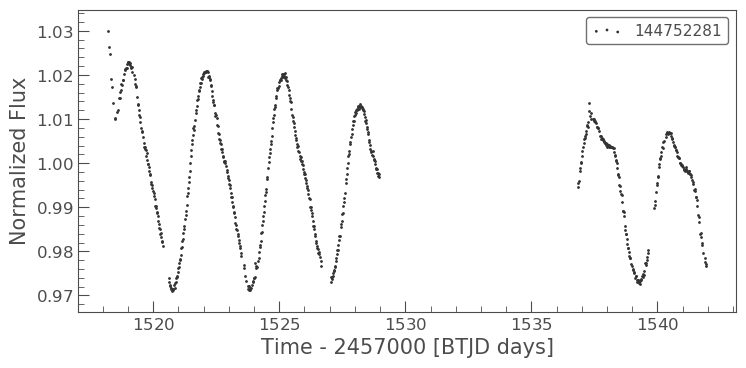

In [80]:
# Few global parameters
sigma=2.5

# Parameters for LS & bootstrap algorithm
threshold = 1.
prot_lims = (0.1, 28.)

# Import and plot Light Curve 
lc = TessLightCurveFile('DataOutput/LightCurves/TESS_LC_144752281_SEC8.fits').get_lightcurve('FLUX')
lc.remove_outliers(sigma=sigma).scatter(title='Light Curve w/ sigma clip=2.5')

In [81]:
threshold = 1.
prot_lims = (0.1, 28.)

fund_period, fund_power, periods_to_test, periodogram, aliases, sigmas = prot.run_ls(lc.time, lc.flux, lc.flux_err, 1., prot_lims=prot_lims,run_bootstrap=True)

In [82]:
aliases

array([0.23137322, 0.12016311, 0.08115552, 0.27188848, 0.13024261,
       0.08563126])

In [83]:
sigmas

array([0.03582723, 0.03146948, 0.02734537])

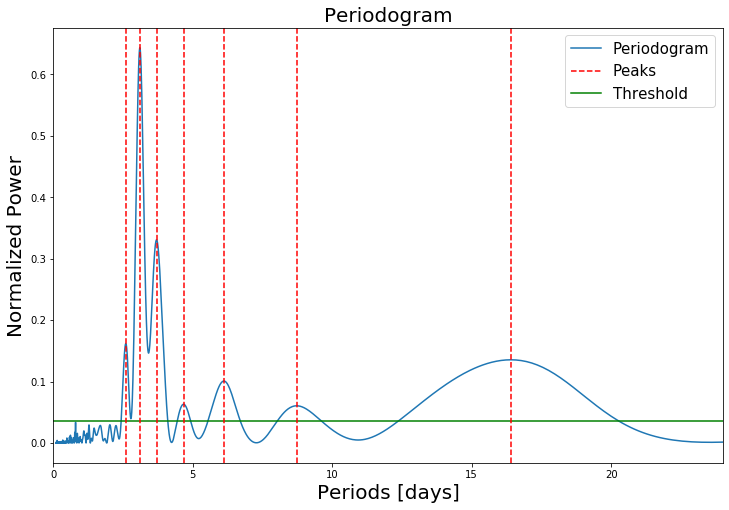

In [115]:
# Find local maxima in data; most credible periods
peaks = argrelmax(periodogram)[0]

# Remove any peak below threshold
acceptable_peaks = periodogram[peaks] > sigmas[0]
new_peaks = peaks[acceptable_peaks]
period_peaks = periods_to_test[new_peaks]

plt.figure(figsize=(12,8))
pg_curve = plt.plot(periods_to_test, periodogram)
plt.xlabel('Periods [days]', fontsize=20)
plt.ylabel('Normalized Power', fontsize=20)
plt.title('Periodogram', fontsize=20)
# print('Found period =', fund_period)
threshold_line = plt.axhline(sigmas[0], color='green')

for period_peak in period_peaks:
    red_dash = plt.axvline(period_peak, ls='--', c='red')

plt.xlim(0, 24)
# plt.xscale('log')
plt.legend([pg_curve[0], red_dash, threshold_line], ['Periodogram', 'Peaks', 'Threshold'], fontsize=15)
plt.savefig('periodogram.jpg', dpi=200)


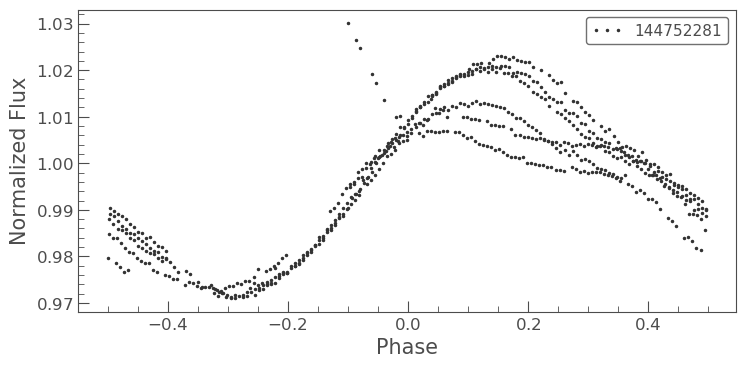

In [119]:
lc.remove_outliers(sigma=sigma).fold(fund_period).plot(marker='.', ls='', markersize='3')
plt.savefig('folded.jpg', dpi=200)

## --- Separation --- New Light Curve ---

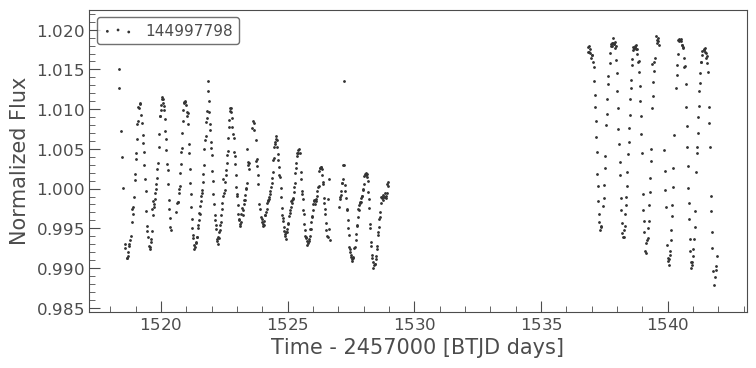

In [47]:
# Import and plot Light Curve 
lc = TessLightCurveFile('DataOutput/LightCurves/TESS_LC_144997798_SEC8.fits').get_lightcurve('FLUX')
lc.remove_outliers(sigma=sigma).scatter(title='Light Curve w/ sigma clip=2.5')

In [48]:
# Run LS for this 
fund_period, fund_power, periods_to_test, periodogram, aliases, sigmas = prot.run_ls(lc.time, lc.flux, lc.flux_err, 1., prot_lims=prot_lims,run_bootstrap=True)

Found period = 16.31606549734864


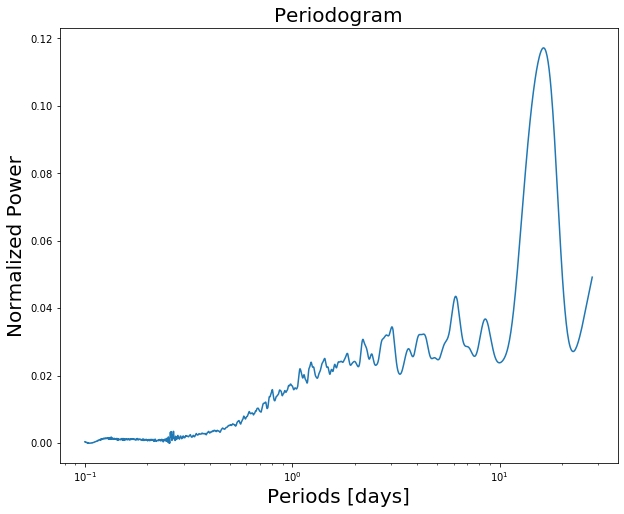

In [69]:
plt.figure(figsize=(10,8))
plt.plot(periods_to_test, periodogram)
plt.xlabel('Periods [days]', fontsize=20)
plt.ylabel('Normalized Power', fontsize=20)
plt.title('Periodogram', fontsize=20)
plt.xscale("log")
print('Found period =', fund_period)

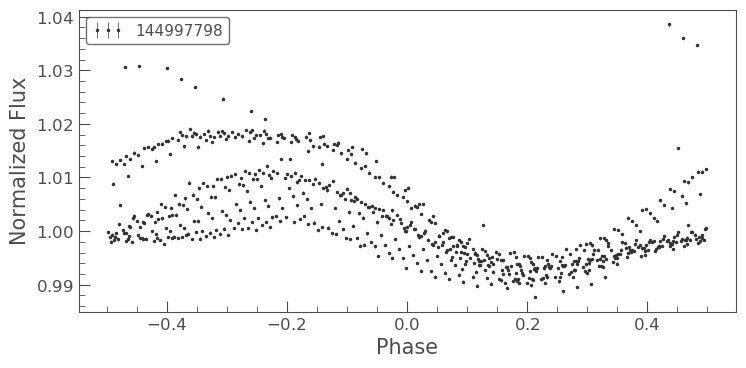

In [54]:
lc.fold(fund_period).errorbar(marker='.', ls='', markersize='3')

## --- Separation --- New Light Curve ---

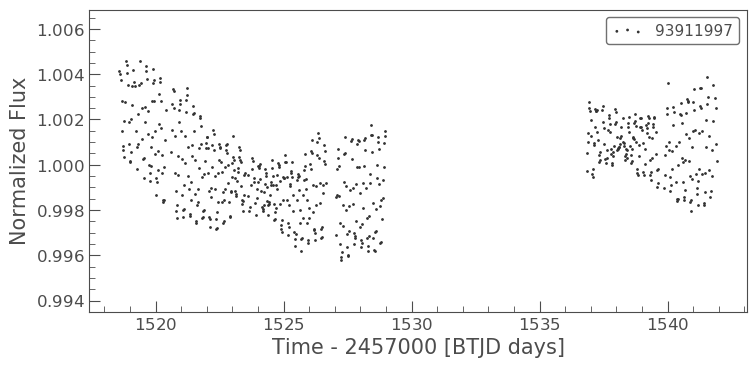

In [71]:
# Import and plot Light Curve 
lc = TessLightCurveFile('DataOutput/LightCurves/TESS_LC_93911997_SEC8.fits').get_lightcurve('FLUX')
lc.remove_outliers(sigma=sigma).scatter(title='Light Curve w/ sigma clip=2.5')

Found period = 0.010417958059384445


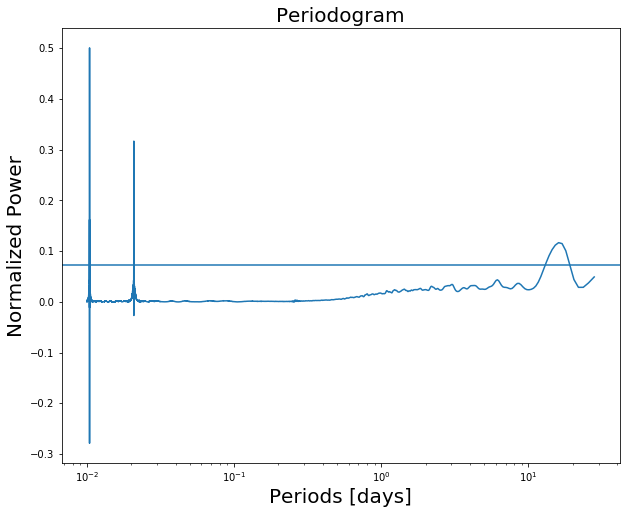

In [76]:
plt.figure(figsize=(10,8))
plt.plot(periods_to_test, periodogram)
plt.xlabel('Periods [days]', fontsize=20)
plt.ylabel('Normalized Power', fontsize=20)
plt.title('Periodogram', fontsize=20)
plt.xscale('log')
print('Found period =', fund_period)
plt.axhline(sigmas[0])


In [78]:
aliases

array([0.01000119, 0.00961648, 0.00926028, 0.01087097, 0.01136517,
       0.01190645])

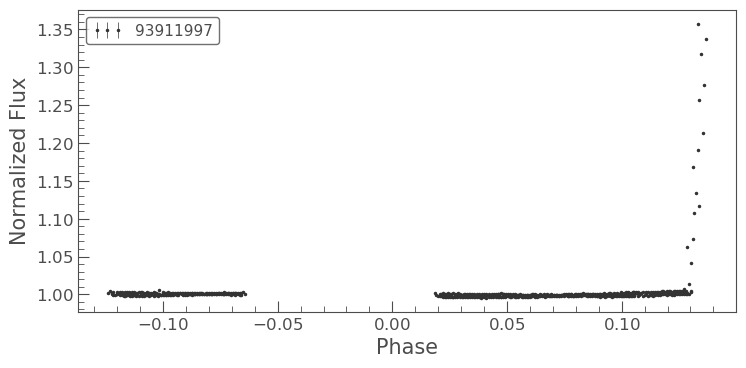

In [75]:
lc.fold(fund_period).errorbar(marker='.', ls='', markersize='3')